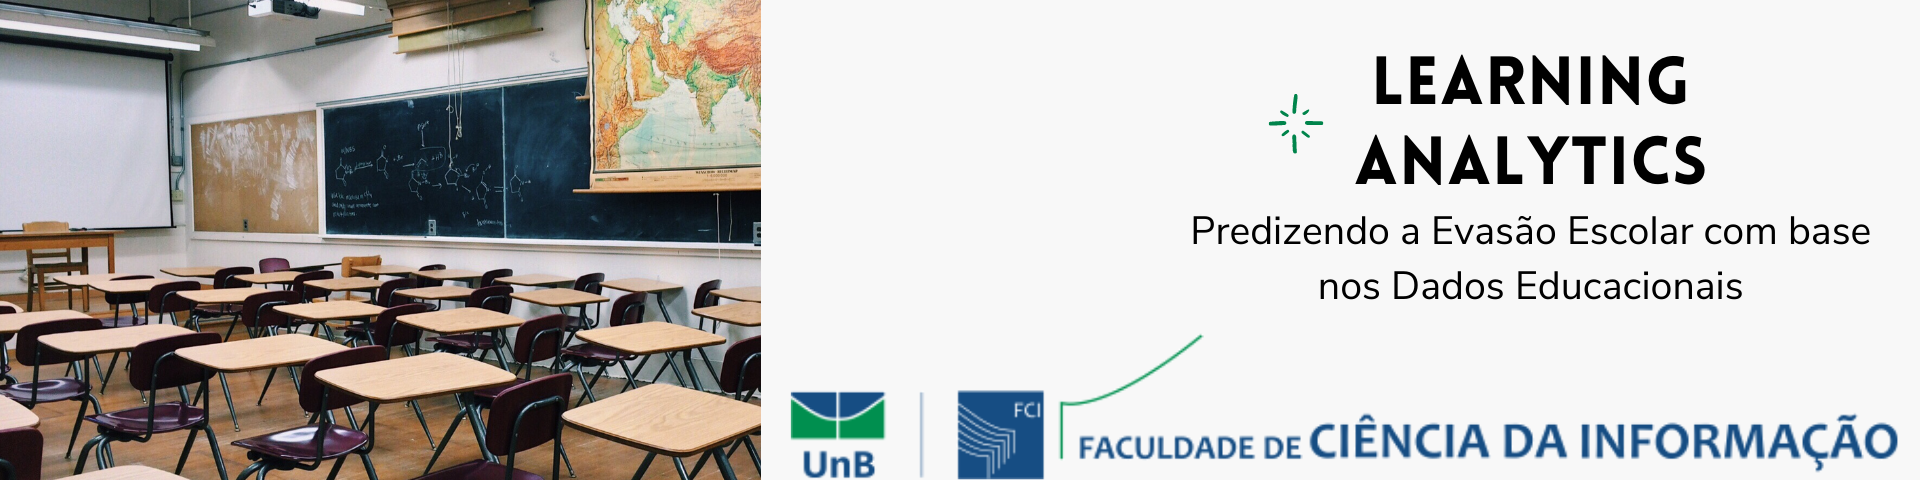



# Learning Analytics: Predizendo a Evasão Escolar com Base nos Dados Educacionais  *Learning Analytics: Predicting School Dropout based on Educational Data*

# Pesquisadoras e Pesquisadores


> Bloco com recuo


| Nome  | Especialização | IES |
| :---: | :-----------: | :---: |
| Fernanda Monteiro| Ciência da Informação | UNB |
| Leonardo Marçal  | Biblioteconomia e Des. Sistemas | UFPE |
| Camila Duarte  | Biblioteconomia | UNB |
| Isabela  | Biblioteconomia | UNB |

Os dados são provenientes do Portal de Dados Abertos do Governo Federal podendo ser acessado neste [link](https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados).

Assim como, os dados sociodemográficos do PNAD, podendo serem acessados neste [link](https://www.ibge.gov.br/estatisticas/sociais/trabalho/17270-pnad-continua.html?=&t=downloads)

As variáveis desse dataset são:


O objeto inicial deste dataset é realizar uma exploração dos dados presentes assim como as análises iniciais. 

1. Importando Bibliotecas Python

In [96]:
import pandas as pd
import numpy as np

#Gráfico
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import r2_score #método para o cálculo do R2
from sklearn.metrics import mean_squared_error #erro absoluto

2. Importando base de dados a ser explorada

In [144]:
#upload do dataset
df = pd.read_csv('/content/dados.csv')

In [145]:
#apresentando as 5 primeiras linhas do dataset
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [146]:
df.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [147]:
df.shape #verifica total do conjunto

(76840, 7)

In [148]:
df.describe() #análise estatística


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [149]:
df.isnull().sum()  #verifica presenca de valores não uniformes


UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [150]:
df.isnull().values.any()


False

In [151]:
df.dtypes


UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object


**Qual é o Valor Médio Para os Pesos Declarados?**

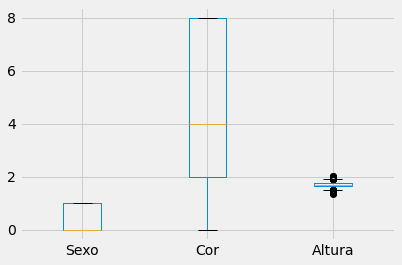

In [152]:
#identificando possíveis outliers
df[['Sexo','Cor', 'Altura']].boxplot()

3. Tratamento e manipulação dos dados¶


In [153]:
# Quantas categorias existem em cada coluna?

for col in df.columns:
  print(col, " :", len(df[col].unique()))

UF  : 27
Sexo  : 2
Idade  : 84
Cor  : 5
Anos de Estudo  : 17
Renda  : 1606
Altura  : 76831


In [154]:
# Atribuindo labels para as categorias da variável UF

Dict_UF = {
    11 : 'Rondônia',
    12 : 'Acre',
    13 : 'Amazonas',
    14 : 'Roraima',
    15 : 'Pará',
    16 : 'Amapá',
    17 : 'Tocantins',
    21 : 'Maranhão',
    22 : 'Piauí',
    23 : 'Ceará',
    24 : 'Rio Grande do Norte',
    25 : 'Paraíba',
    26 : 'Pernambuco',
    27 : 'Alagoas',
    28 : 'Sergipe',
    29 : 'Bahia',
    31 : 'Minas Gerais',
    32 : 'Espírito Santo',
    33 : 'Rio de Janeiro',
    35 : 'São Paulo',
    41 : 'Paraná',
    42 : 'Santa Catarina',
    43 : 'Rio Grande do Sul',
    50 : 'Mato Grosso do Sul',
    51 : 'Mato Grosso',
    52 : 'Goiás',
    53 : 'Distrito Federal'
}

In [155]:
df["UF"] = df["UF"].map(Dict_UF)


In [156]:
# Verificando se os labels foram atribuídos às categorias de UF
df.loc[2000:2005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
2000,Acre,0,44,8,13,4000,1.665312
2001,Acre,0,30,2,16,3000,1.690788
2002,Acre,0,59,8,1,900,1.903044
2003,Acre,0,48,8,12,2500,1.780344
2004,Acre,0,59,4,16,2500,1.691845
2005,Acre,1,43,8,16,2400,1.645096


Tratamento da variável Sexo
A variável sexo precisa de alterações.

Valor 0 é atribuído ao 'masculino'.

Valor 1 é atribuído ao 'feminino'.

In [157]:
# Atribuindo labels para as categorias da variável UF

Dict_Sexo = {
    0 : 'masculino',
    1 : 'feminino'
    }

In [158]:
df["Sexo"] = df["Sexo"].map(Dict_Sexo)


# Tratamento da variável Idade e Tratamento da variável Cor


In [159]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 4.1+ MB


In [160]:
Dict_Cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
    }

In [161]:
df["Cor"] = df["Cor"].map(Dict_Cor)


In [162]:
# verificando se as alterações foram feitas
df.loc[45000:45005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
45000,Rio de Janeiro,masculino,36,Branca,12,3200,1.554542
45001,Rio de Janeiro,masculino,38,Preta,12,1650,1.673025
45002,Rio de Janeiro,masculino,24,Parda,9,1500,1.618131
45003,Rio de Janeiro,masculino,45,Branca,16,2500,1.531065
45004,Rio de Janeiro,masculino,66,Branca,9,1300,1.720447
45005,Rio de Janeiro,masculino,25,Branca,11,1500,1.578968


In [163]:
df.groupby('Cor').mean()


,Idade,Anos de Estudo,Renda,Altura
Cor,,,,
Amarela,46.241477,12.556818,4182.920455,1.697996
Branca,45.039070,10.490303,2679.019331,1.699712
Indígena,42.899160,8.224090,1472.887955,1.700664
Parda,43.353570,8.689965,1513.596103,1.699273
Preta,43.434752,8.861518,1442.294840,1.699795


Tratamento da variável Anos de Estudo

In [164]:
df['Anos de Estudo'].value_counts()


12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

In [165]:
Dict_Anos = {
  1 : 0,
  2 : 1,
  3 : 2,
  4 : 3,
  5 : 4,
  6 : 5,
  7 : 6,
  8 : 7,
  9 : 8,
  10 : 9,
  11 : 10,
  12 : 11,
  13 : 12,
  14 : 13,
  15 : 14,
  16 : 15,
  17 : 0
}

In [166]:
df["Anos de Estudo"] = df["Anos de Estudo"].map(Dict_Anos)

In [167]:
# verificando se as mudanças foram feitas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  object 
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


# Tratamento da variável Altura

In [168]:
df['Altura'] = round(df['Altura'], 2)

In [169]:
df.loc[900:905]


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
900,Rondônia,feminino,49,Parda,8,900,1.68
901,Rondônia,feminino,40,Indígena,3,900,1.66
902,Rondônia,feminino,44,Parda,4,700,1.72
903,Rondônia,masculino,54,Parda,8,780,1.79
904,Rondônia,feminino,53,Parda,8,788,1.76
905,Rondônia,feminino,42,Parda,4,850,1.79


# Verificar os tipos de variáveis após os devidos tratamentos¶


In [170]:
df.dtypes


UF                 object
Sexo               object
Idade               int64
Cor                object
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

# Análise Descritiva das variáveis do banco de *dados*

In [171]:
# Resumo das variáveis

df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

# Análise da variável UF

In [172]:
df["UF"].value_counts()

São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: UF, dtype: int64

Text(0.5, 1.0, 'Frequência de estudantes por UF')

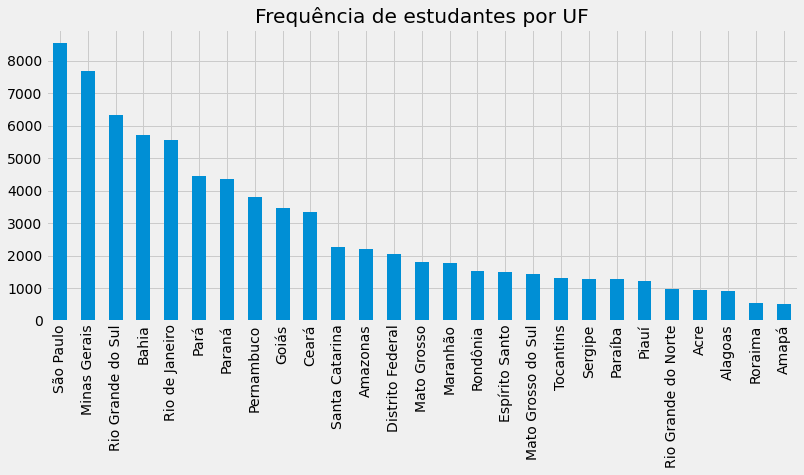

In [173]:
df["UF"].value_counts().plot(kind = 'bar', figsize=(12,5))
plt.title("Frequência de estudantes por UF")

# Análise da variável SEXO

In [174]:
df["Sexo"].value_counts()

masculino    53250
feminino     23590
Name: Sexo, dtype: int64

Text(0.5, 1.0, 'Frequência de estudantes por Sexo')

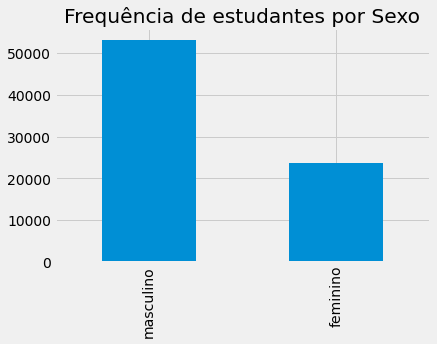

In [175]:
df["Sexo"].value_counts().plot(kind = 'bar')
plt.title("Frequência de estudantes por Sexo")
# 0 para masculino;
# 1 para feminino.

#Análise da variável IDADE

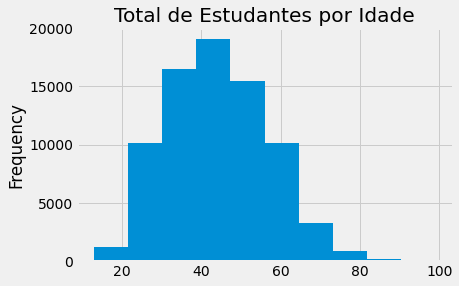

In [177]:
plt.title("Total de Estudantes por Idade")
df["Idade"].plot(kind = 'hist')

In [178]:
#quantas pessoas tem idade inferior a 20 anos
len(df["Idade"][df["Idade"]<20])

423

In [179]:
print("Idade máxima", df["Idade"].max())
print("Idade mínima", df["Idade"].min())

Idade máxima 99
Idade mínima 13


#Análise da Variável Cor

In [180]:
df["Cor"].value_counts()

Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: Cor, dtype: int64

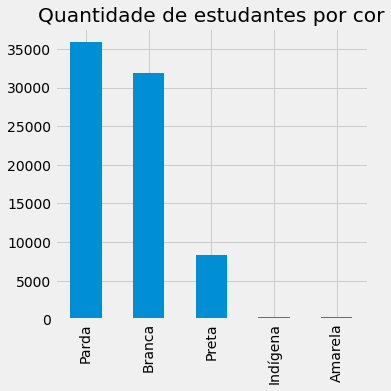

In [182]:
plt.figure(figsize = (5,5))
plt.title("Quantidade de estudantes por cor")
df["Cor"].value_counts().plot(kind = 'bar')

# Análise da variável ANOS DE ESTUDO


In [183]:
df["Anos de Estudo"].value_counts()

11    20848
15    10795
8      7980
4      6729
0      6040
5      4499
3      2891
7      2689
6      2445
10     2118
2      2101
9      1840
12     1836
14     1388
1      1388
13     1253
Name: Anos de Estudo, dtype: int64

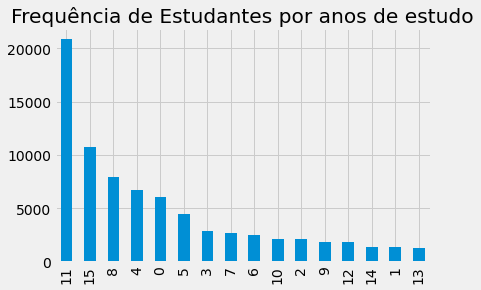

In [184]:
plt.title("Frequência de Estudantes por anos de estudo")
df["Anos de Estudo"].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Anos de Estudo x Cor')

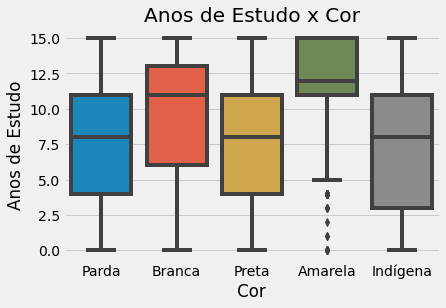

In [185]:
# Anos de estudo por Cor
sns.boxplot(x = df['Cor'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Cor")

Text(0.5, 1.0, 'Anos de Estudo x Sexo')

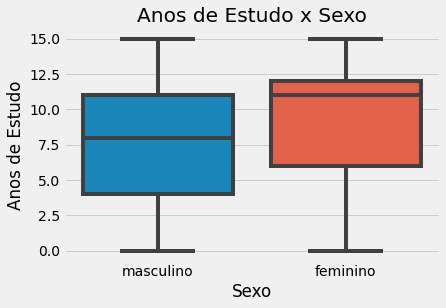

In [186]:
# Anos de estudo por Sexo
sns.boxplot(x = df['Sexo'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Sexo")

Text(0.5, 1.0, 'Média dos anos de estudos por UF')

<Figure size 720x720 with 0 Axes>

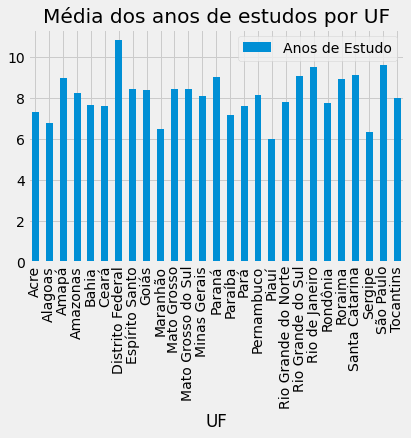

In [187]:
plt.figure(figsize = (10,10))
df.groupby('UF').mean()[['Anos de Estudo']].plot(kind='bar')
plt.title("Média dos anos de estudos por UF")

# Análise da variável RENDA

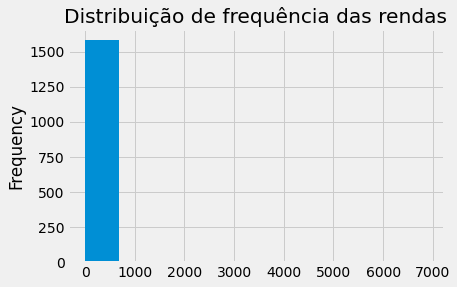

In [188]:
plt.title("Distribuição de frequência das rendas")
df["Renda"].value_counts().plot(kind = 'hist')

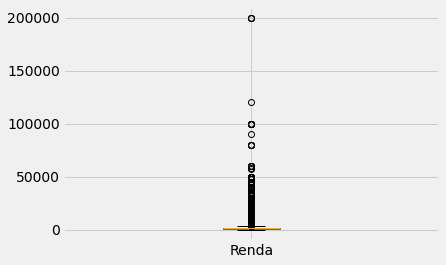

In [189]:
df.boxplot(['Renda'])

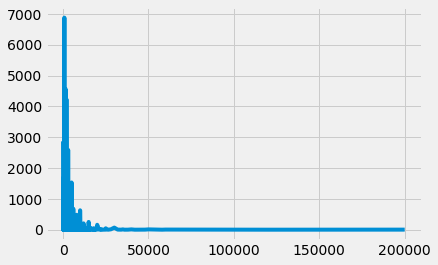

In [190]:
df['Renda'].value_counts().sort_index().plot.line()

In [191]:
df['Log_Renda'] = np.log(df['Renda']) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


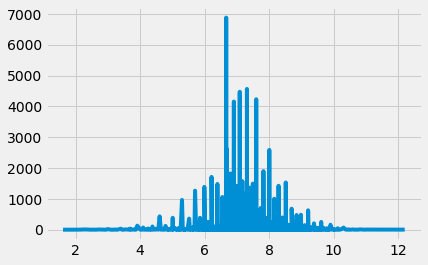

In [192]:
df['Log_Renda'].value_counts().sort_index().plot.line()


In [193]:
df.head()


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Log_Renda
0,Rondônia,masculino,23,Parda,11,800,1.60,6.684612
1,Rondônia,feminino,23,Branca,11,1150,1.74,7.047517
2,Rondônia,feminino,35,Parda,14,880,1.76,6.779922
3,Rondônia,masculino,46,Branca,5,3500,1.78,8.160518
4,Rondônia,feminino,47,Parda,8,150,1.69,5.010635


In [195]:
# Buscando Informações sobre estudantes com rendas inferiores e superiores
print("Pessoas com Renda < 20 k :", len(df["Renda"][df["Renda"] < 20000]))
print("Pessoas com Renda > 20 k :", len(df["Renda"][df["Renda"] > 20000]))
print("Pessoas com Renda > 40 k :", len(df["Renda"][df["Renda"] > 40000]))
print("\nRenda Média:", round(df['Renda'].mean(), 2))
print("Renda Máxima :", df["Renda"].max())
print("Renda Mínima:", df["Renda"].min())

Pessoas com Renda < 20 k : 76420
Pessoas com Renda > 20 k : 259
Pessoas com Renda > 40 k : 41

Renda Média: 2000.38
Renda Máxima : 200000
Renda Mínima: 0


Text(0.5, 1.0, 'Frequência de Rendas (<5k)')

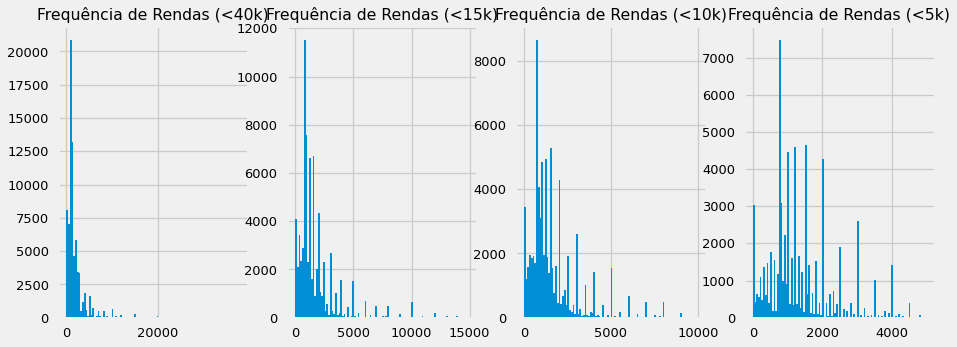

In [196]:
# histograma plot com zoom
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(1, 4, figsize = (14, 5))
ax[0].hist(df["Renda"][df["Renda"] < 40000], bins = 100)
ax[0].set_title('Frequência de Rendas (<40k)')
ax[1].hist(df["Renda"][df["Renda"] < 15000], bins = 100)
ax[1].set_title('Frequência de Rendas (<15k)')
ax[2].hist(df["Renda"][df["Renda"] < 10000], bins = 100)
ax[2].set_title('Frequência de Rendas (<10k)')
ax[3].hist(df["Renda"][df["Renda"] < 5000], bins = 100)
ax[3].set_title('Frequência de Rendas (<5k)')

Text(0.5, 1.0, 'Frequência de Rendas (>40k)')

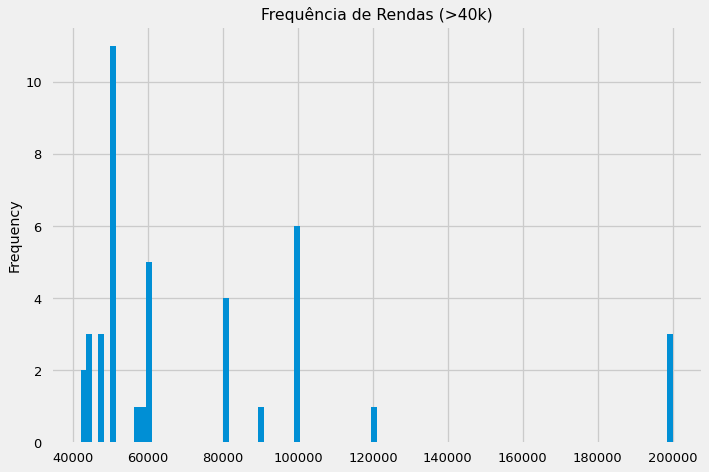

In [197]:
df["Renda"][df["Renda"] > 40000].plot(kind = 'hist', bins = 100)
plt.title('Frequência de Rendas (>40k)')

Text(0.5, 1.0, 'Frequência de Rendas (<5k)')

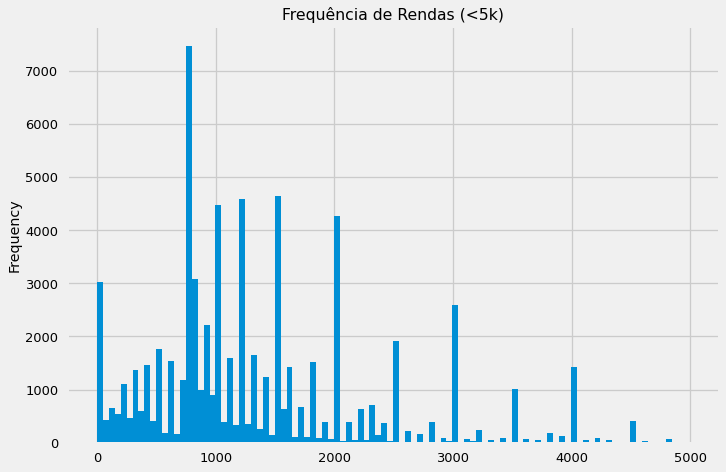

In [198]:
df["Renda"][df["Renda"] <5000].plot(kind = 'hist', bins = 100)
plt.title('Frequência de Rendas (<5k)')

É possível avaliar a renda do brasileiro segundo a quantidade  de tempo estudado? A idade Influencia?


# 4. Análise bidimensional




*  RENDA x COR


